In [43]:
import sys
from pathlib import Path
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns


###
sys.path.append('../../src/')
from bonsai import load_bonsai_config
load_bonsai_config(r"C:\git\AllenNeuralDynamics\aind-vr-foraging\Bonsai")

import harp
import harp.processing as hp


In [44]:
#Global Viz settings
sns.set_style('darkgrid') # darkgrid, white grid, dark, white and ticks
plt.rc('axes', titlesize=18)     # fontsize of the axes title
plt.rc('axes', labelsize=14)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=13)    # fontsize of the tick labels
plt.rc('ytick', labelsize=13)    # fontsize of the tick labels
plt.rc('legend', fontsize=13)    # legend fontsize
plt.rc('font', size=13)          # controls default text sizes

mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
mpl.rcParams['font.family'] = 'Arial'



In [2]:
HarpBehavior = harp.Device("Behavior")
AnalogInput = harp.Device("AnalogInput")

## Paths to the data:
root = Path(r'Z:\scratch\vr-foraging\scratchpad\pid_benchmarks\20230921')
rig = "VR2"
fname_formatter = lambda reg : f"reg__{reg}.bin"
# Harp.Behavior data:
harp_behavior_root = root / rig / "Behavior"

# Harp.AnalogInput data:
harp_analog_root = root / rig / "Analog"


In [15]:
##Load digital output data
digital_output_onset = HarpBehavior.file_to_dataframe(harp_behavior_root / fname_formatter(34))
digital_output_offset = HarpBehavior.file_to_dataframe(harp_behavior_root / fname_formatter(35))

digital_outputs = HarpBehavior.module.DigitalOutputs

odor1_state = hp.distinct_until_changed_state(digital_output_onset, digital_output_offset, digital_outputs.SupplyPort1)
odor2_state = hp.distinct_until_changed_state(digital_output_onset, digital_output_offset, digital_outputs.SupplyPort2)

##Load analog input data
pid_data = harp.read_harp_bin(harp_analog_root / fname_formatter(33))



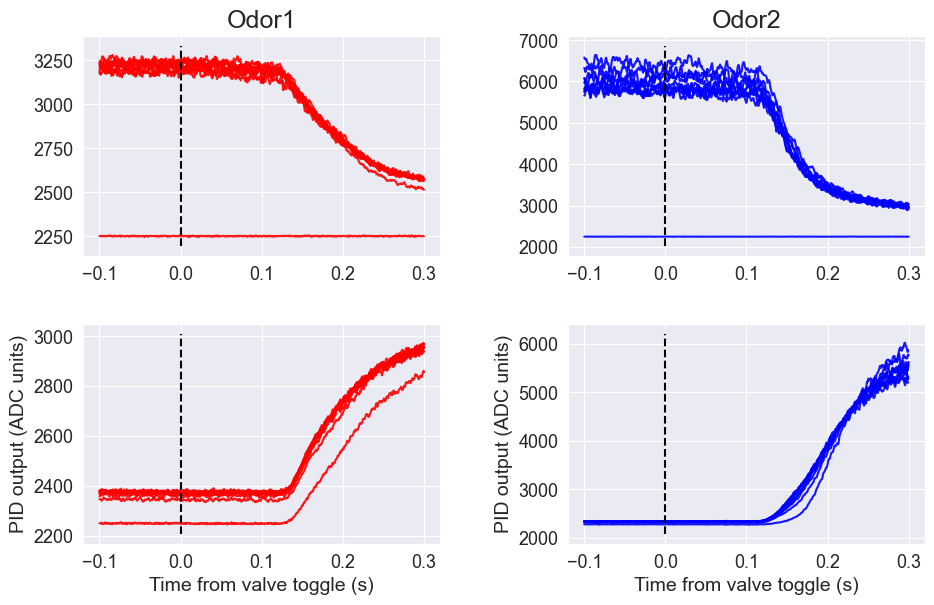

In [61]:
channel_idx = 0
window = (-0.1, 0.3)
colors = ["r", "b"]
fig, axs = plt.subplots(2,2)
fig.tight_layout()
fig.set_size_inches(10, 6)
for odor_id, df in enumerate([odor1_state, odor2_state]):
    for i, (state, sub_df) in enumerate(df.groupby(by="Value", sort=True)):
        for idx, *row in sub_df.itertuples():
            analog_slice = pid_data.loc[idx + window[0]: idx + window[1], :]
            axs[i, odor_id].plot(
                analog_slice.index.values - idx,
                analog_slice[channel_idx].values,
                color=colors[odor_id], alpha=0.9)
        axs[i, odor_id].vlines(0, *axs[i, odor_id].get_ylim(), color="k", linestyle="--")
    axs[i, odor_id].set_xlabel("Time from valve toggle (s)")
    axs[i, odor_id].set_ylabel("PID output (ADC units)")
    axs[0, odor_id].set_title(f"Odor{odor_id + 1}")
